In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
Iris = load_iris()
X = Iris.data
y = Iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # normalised

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y # test data = 20% and random state is saving the split perma and stratify is same ratio for each iris
)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [6]:
class IrisMLP(nn.Module):
    def __init__(self):
        super(IrisMLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [7]:
model = IrisMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
num_epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    accuracy = (preds == y_train).float().mean().item()

    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{100}, Loss: {loss.item():.4f}, Accuracy: {accuracy*100:.2f}%")


Epoch 10/100, Loss: 0.9006, Accuracy: 74.17%
Epoch 20/100, Loss: 0.5660, Accuracy: 89.17%
Epoch 30/100, Loss: 0.3616, Accuracy: 90.00%
Epoch 40/100, Loss: 0.2680, Accuracy: 91.67%
Epoch 50/100, Loss: 0.2068, Accuracy: 93.33%
Epoch 60/100, Loss: 0.1582, Accuracy: 95.00%
Epoch 70/100, Loss: 0.1235, Accuracy: 96.67%
Epoch 80/100, Loss: 0.1014, Accuracy: 97.50%
Epoch 90/100, Loss: 0.0864, Accuracy: 97.50%
Epoch 100/100, Loss: 0.0764, Accuracy: 97.50%


In [12]:
def evaluate(model, X, y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y).float().mean().item()
        return predicted, accuracy

train_pred, train_acc = evaluate(model, X_train, y_train)
test_pred, test_acc = evaluate(model, X_test, y_test)

print(f"\nTrain Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")



Train Accuracy: 97.50%
Test Accuracy: 96.67%


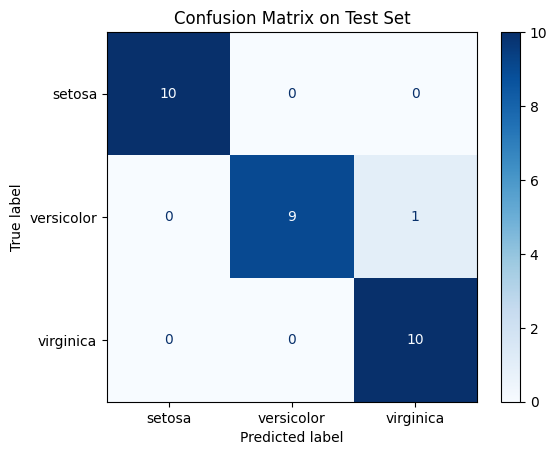


Classification Report on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [10]:
# 7. Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()

# Classification Report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_pred, target_names=Iris.target_names))


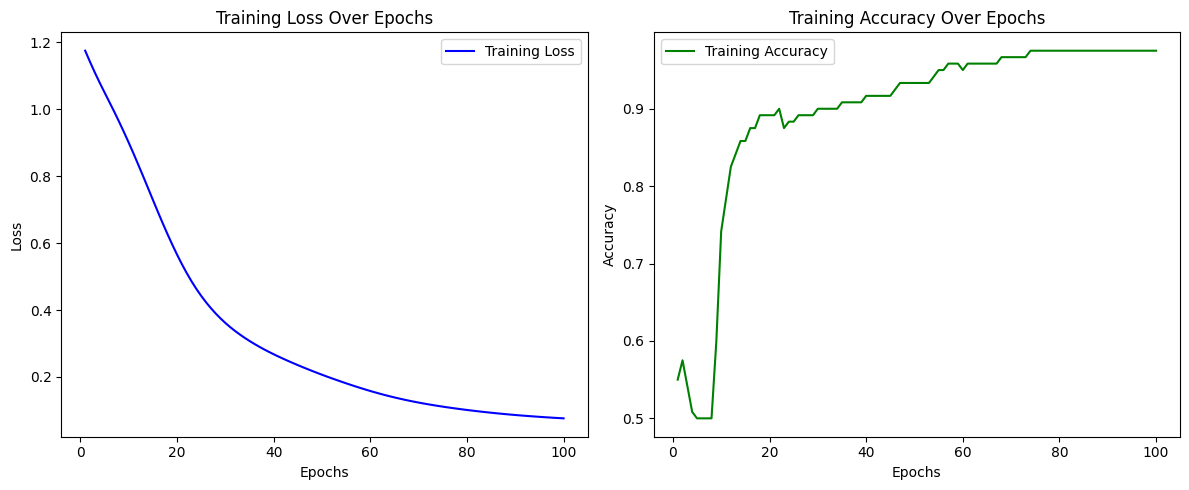

In [11]:
epochs = range(1, num_epochs+1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'g-', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
